<a href="https://colab.research.google.com/github/rigolivares/coderhouse/blob/main/Rigoberto_Olivares_Preetrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis y Predicción de Ventas para una Empresa de Delivery
En este trabajo, nos enfocaremos en el análisis exhaustivo de una empresa de delivery, utilizando un dataset que proporciona información detallada sobre los pedidos realizados por los usuarios tanto semanal como mensualmente. Además, el dataset incluye datos sobre los ingresos generados por la empresa en términos de órdenes. Un aspecto destacado de este análisis será el programa de fidelización conocido como "Plus".

Los objetivos principales de este estudio son dos:

1.   Evaluación del Impacto del Programa Plus: Analizaremos el impacto del programa de fidelización Plus en las ventas y la retención de clientes. La meta es demostrar que los usuarios suscritos al programa Plus son más beneficiosos para la empresa en comparación con los usuarios regulares.

2.   Predicción de Ventas Futuras: Utilizando técnicas de modelado y análisis de datos, buscaremos predecir las ventas futuras de la empresa. Esto permitirá a la empresa tomar decisiones informadas sobre estrategias de crecimiento y optimización de recursos.


En esta primera entrega nos centraremos en el punto 1.

Este análisis está basado en datos actualizados al 21 de mayo de 2024

In [78]:
#Importamos librerias importantes para el trabajo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter
from google.colab import drive

from google.colab import data_table

import os
#drive.mount('/content/drive')

# Colores personalizados que ire utilizando con los graphs
colors = ['#f52f41', '#00d9fc', '#ff8aff', '#ffd700' , '#ff6d01', '#cccccc' , '#008297']


Importamos la bbdd y revisamos los tipos de datos de la importación.

In [79]:
# Definir la ruta del archivo
file_path = '/content/drive/My Drive/CODERHOUSE_Rigoberto_Olivares/proyecto_ds_01/bbdd_delivery.csv'

df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
#print(df[['date_month','total_confirmed_order']].head())

df.head()

# Ver los tipos de datos de cada columna
print(df.dtypes)


date_month                         object
date_week                          object
partner_area_name                  object
name_city                          object
zonas                              object
zonas_santiago                     object
business_type_name                 object
vertical                           object
total_confirmed_order               int64
total_active_users                  int64
total_failed_order                  int64
total_failed_active_users           int64
total_confirmed_orders_plus         int64
total_plus_active_users             int64
total_failed_orders_plus            int64
total_failed_plus_active_users      int64
total_GFV                         float64
total_GFV_PLUS                    float64
total_GFV_NO_PLUS                 float64
total_GMV                         float64
total_GMV_PLUS                    float64
total_GMV_NO_PLUS                 float64
dtype: object


Basado en lo que vimos con la función dtypes en el código anterior cambiamos los tipo de datos de nuestro DF para poder trabajar correctamente con las variables. Especialmente las de fechas y las métricas que deben ser intengers.

In [80]:
# Convertir date_month a datetime
df['date_month'] = pd.to_datetime(df['date_month'], errors='coerce')

# Convertir date_week a datetime
df['date_week'] = pd.to_datetime(df['date_week'], errors='coerce')

# Verificar y convertir todas las columnas que comienzan con 'total_' a int64
total_columns = [col for col in df.columns if col.startswith('total_')]

for col in total_columns:
    # Reemplazar NaN con 0 antes de la conversión
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Verificar las conversiones
print(df.dtypes)
df.head()


date_month                        datetime64[ns]
date_week                         datetime64[ns]
partner_area_name                         object
name_city                                 object
zonas                                     object
zonas_santiago                            object
business_type_name                        object
vertical                                  object
total_confirmed_order                      int64
total_active_users                         int64
total_failed_order                         int64
total_failed_active_users                  int64
total_confirmed_orders_plus                int64
total_plus_active_users                    int64
total_failed_orders_plus                   int64
total_failed_plus_active_users             int64
total_GFV                                  int64
total_GFV_PLUS                             int64
total_GFV_NO_PLUS                          int64
total_GMV                                  int64
total_GMV_PLUS      

,date_month,date_week,partner_area_name,name_city,zonas,zonas_santiago,business_type_name,vertical,total_confirmed_order,total_active_users,...,total_confirmed_orders_plus,total_plus_active_users,total_failed_orders_plus,total_failed_plus_active_users,total_GFV,total_GFV_PLUS,total_GFV_NO_PLUS,total_GMV,total_GMV_PLUS,total_GMV_NO_PLUS
0,2021-09-01,2021-09-13,Arauco,Lebu,other,Regiones,DRINKS,non_food,1,1,...,0,0,0,0,13000,0,13000,14390,0,14390
1,2022-05-01,2022-05-23,La Pintana,Santiago,RM,Zona No Oriente,RESTAURANT,food,445,359,...,0,0,0,0,5976884,0,5976884,6746775,0,6746775
2,2022-07-01,2022-07-18,Constitución,Talca,Sur,Regiones,RESTAURANT,food,21,20,...,0,0,0,0,237651,0,237651,267245,0,267245
3,2023-08-01,2023-08-14,Linares,Linares,Sur,Regiones,RESTAURANT,food,1715,1298,...,172,101,4,101,20133202,1729958,18403244,21964862,1852068,20112794
4,2022-09-01,2022-09-19,Cerro Navia,Santiago,RM,Zona No Oriente,RESTAURANT,food,242,206,...,1,1,0,1,3348484,21882,3326602,3731850,21882,3709968


Ya que nuestro DF viene con granularidad mensual y semanal debemos elegir con tipo de periodos trabajar en esta parte exploratoria. Para simplificar cambiaremos nuestro DF a solo Meses. Por lo que redifinimos nuestro DF como monthly_sales.

Además necesitamos hacer un par de ajustes al nuevo DF.

1.   Calcular ciertas métricas imporantes para evaluar el programa de plus vs los usuarios no plus.
2.   Cambiar los valores para las métricas plus anterior a enero 2022, ya que en el codigo anterior rellenamos esos NaaN con 0 para los calculos de las nuevas variables. Pero realmente deben ser NaaN para no alterar los primeros gráficos.

In [81]:
# Seleccionamos las variables que comienzan con el texto total_ que seran nuestras metricas de comparación entre usuarios dentro del programa y fuera del programa.
total_columns = [col for col in df.columns if col.startswith('total_')]

# Agrupamos por mes y sumamos las columnas que empiezan con 'total_'
monthly_sales = df.groupby('date_month')[total_columns].sum().reset_index()

# Convertimos 'date_month' a periodo mensual para tener un formato consistente
monthly_sales['date_month'] = pd.to_datetime(monthly_sales['date_month']).dt.to_period('M').dt.to_timestamp()

# Renombrar las columnas para mayor claridad
monthly_sales.rename(columns={
    'total_confirmed_order': 'total_orders',
    'total_confirmed_orders_plus': 'total_orders_plus'
}, inplace=True)


# Ahora voy a calcular ciertas kpi y metricas que nos serviran para ir comparando usuarios plus y usuarios que no son parte del programa.
monthly_sales['total_orders_non_plus'] = monthly_sales['total_orders'] - monthly_sales['total_orders_plus']
monthly_sales['total_non_plus_active_user'] = monthly_sales['total_active_users'] - monthly_sales['total_plus_active_users']
monthly_sales['total_failed_orders_non_plus'] = monthly_sales['total_failed_order'] - monthly_sales['total_failed_orders_plus']

monthly_sales['frequency_plus'] = round(monthly_sales['total_orders_plus']/ monthly_sales['total_plus_active_users'],2)
monthly_sales['frequency_non_plus'] = round(monthly_sales['total_orders_non_plus']/ monthly_sales['total_non_plus_active_user'],2)

monthly_sales['afv_plus'] = round(monthly_sales['total_GFV_PLUS']/ monthly_sales['total_orders_plus'],2)
monthly_sales['afv_non_plus'] = round(monthly_sales['total_GFV_NO_PLUS']/ monthly_sales['total_orders_non_plus'],2)

monthly_sales['fail_rate_plus'] = round(monthly_sales['total_failed_orders_plus']/ monthly_sales['total_orders_plus'],6)
monthly_sales['fail_rate_non_plus'] = round(monthly_sales['total_failed_orders_non_plus']/ monthly_sales['total_orders_non_plus'],6)


# Filtrar los datos para eliminar los valores de total_orders_plus antes de 2022-01 ya que el proyecto comenzo recién en ese periodo. por lo que para cada variable volvemos a transformar de 0 a naan para no estropear graficos
plus_to_nan = ['total_orders_plus', 'total_plus_active_users', 'total_failed_orders_plus', 'total_failed_plus_active_users', 'total_GFV_PLUS', 'total_GMV_PLUS']
monthly_sales.loc[monthly_sales['date_month'] < '2022-01-01', plus_to_nan] = np.nan


# Eliminamos el mes de mayo de 2024 ya que esta con data incompleta.

monthly_sales = monthly_sales[monthly_sales['date_month'] != pd.Timestamp('2024-05-01')]

# Mostrar el resultado
monthly_sales.head()

,date_month,total_orders,total_active_users,total_failed_order,total_failed_active_users,total_orders_plus,total_plus_active_users,total_failed_orders_plus,total_failed_plus_active_users,total_GFV,...,total_GMV_NO_PLUS,total_orders_non_plus,total_non_plus_active_user,total_failed_orders_non_plus,frequency_plus,frequency_non_plus,afv_plus,afv_non_plus,fail_rate_plus,fail_rate_non_plus
0,2021-01-01,2048754,1533512,139788,122909,NaN,NaN,NaN,NaN,24714771950,...,27325486571,2048754,1533512,139788,NaN,1.34,NaN,12063.32,NaN,0.068231
1,2021-02-01,1857831,1365130,102271,90411,NaN,NaN,NaN,NaN,22123758451,...,24325890532,1857831,1365130,102271,NaN,1.36,NaN,11908.38,NaN,0.055049
2,2021-03-01,2244244,1685413,120063,106674,NaN,NaN,NaN,NaN,26372127049,...,28960066755,2244244,1685413,120063,NaN,1.33,NaN,11751.01,NaN,0.053498
3,2021-04-01,2298036,1737002,109719,97900,NaN,NaN,NaN,NaN,27956985156,...,30742525823,2298036,1737002,109719,NaN,1.32,NaN,12165.60,NaN,0.047745
4,2021-05-01,2543398,1915815,174569,156159,NaN,NaN,NaN,NaN,32322452432,...,35560272772,2543398,1915815,174569,NaN,1.33,NaN,12708.37,NaN,0.068636


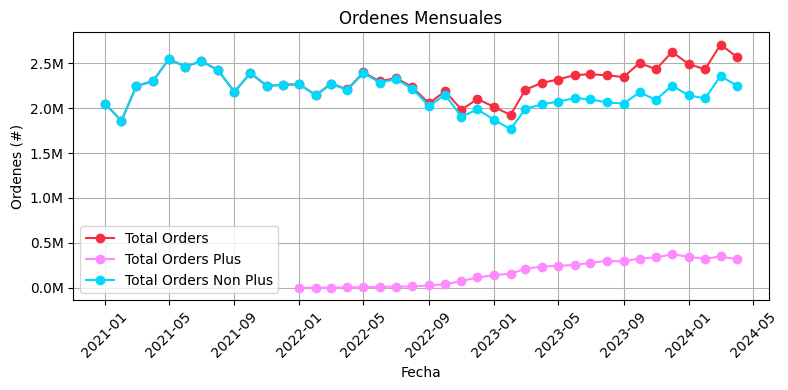

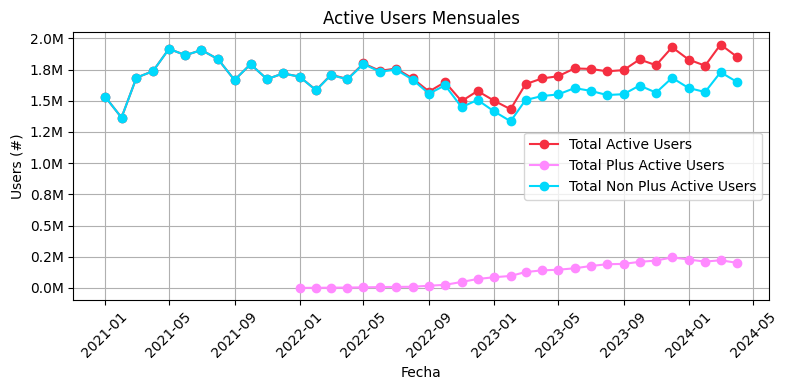

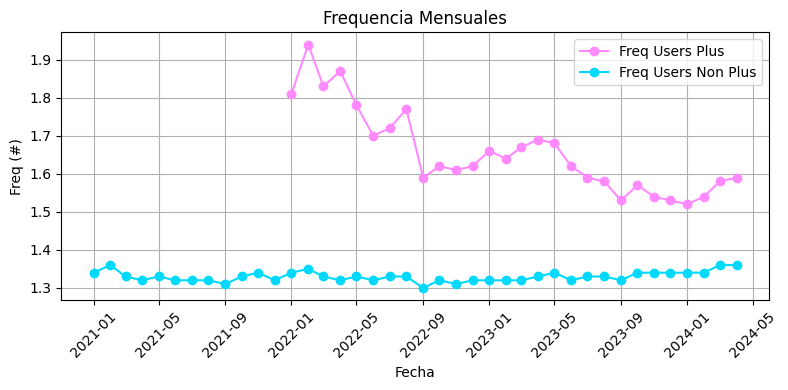

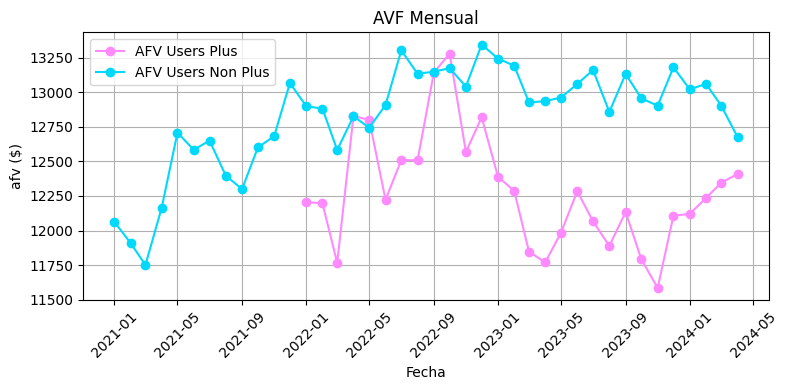

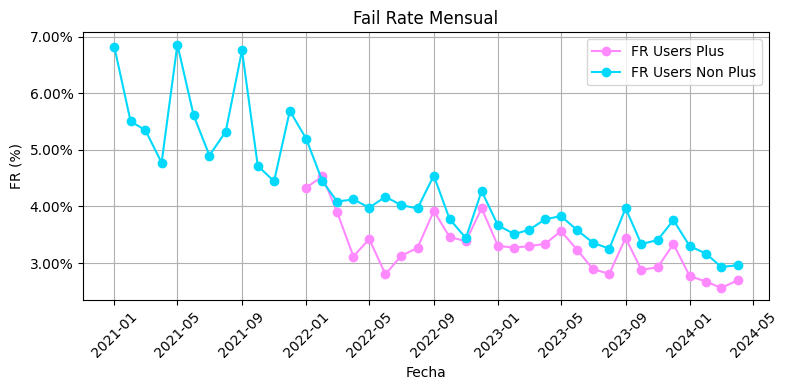

In [82]:
# Primero creamos el grafico de ordenes mensuales para ver la evolucón de estas y ver como irrumpe el programa a principios de 2022
plt.figure(figsize=(8, 4))
# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['total_orders'], marker='o', label='Total Orders', color='#f52f41')
plt.plot(monthly_sales['date_month'], monthly_sales['total_orders_plus'], marker='o', label='Total Orders Plus', color='#ff8aff')
plt.plot(monthly_sales['date_month'], monthly_sales['total_orders_non_plus'], marker='o', label='Total Orders Non Plus', color='#00d9fc')
# Añadir títulos y etiquetas
plt.title('Ordenes Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ordenes (#)')
plt.legend()
plt.grid(True)
# Formatear el eje Y en millones y eliminar notación científica
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Primero creamos el grafico de ordenes mensuales para ver la evolucón de estas y ver como irrumpe el programa a principios de 2022
plt.figure(figsize=(8, 4))
# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['total_active_users'], marker='o', label='Total Active Users', color='#f52f41')
plt.plot(monthly_sales['date_month'], monthly_sales['total_plus_active_users'], marker='o', label='Total Plus Active Users', color='#ff8aff')
plt.plot(monthly_sales['date_month'], monthly_sales['total_non_plus_active_user'], marker='o', label='Total Non Plus Active Users', color='#00d9fc')
# Añadir títulos y etiquetas
plt.title('Active Users Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Users (#)')
plt.legend()
plt.grid(True)
# Formatear el eje Y en millones y eliminar notación científica
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# Crear el gráfico de líneas para frecuencia mensual de los usuarios. Para saber quien consume más mensualmente.
plt.figure(figsize=(8, 4))
# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['frequency_plus'], marker='o', label='Freq Users Plus', color='#ff8aff')
plt.plot(monthly_sales['date_month'], monthly_sales['frequency_non_plus'], marker='o', label='Freq Users Non Plus', color='#00d9fc')
# Añadir títulos y etiquetas
plt.title('Frequencia Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Freq (#)')
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Crear el gráfico de líneas para afv mensual. Lo que nos permite saber cuanto gasta un usuario por pedido.
plt.figure(figsize=(8, 4))
# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['afv_plus'], marker='o', label='AFV Users Plus', color='#ff8aff')
plt.plot(monthly_sales['date_month'], monthly_sales['afv_non_plus'], marker='o', label='AFV Users Non Plus', color='#00d9fc')
# Añadir títulos y etiquetas
plt.title('AVF Mensual')
plt.xlabel('Fecha')
plt.ylabel('afv ($)')
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Finalmnete que tipo de usuario tiene una menor tasa de error o fallos en los pedidos.
plt.figure(figsize=(8, 4))
# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['fail_rate_plus'], marker='o', label='FR Users Plus', color='#ff8aff')
plt.plot(monthly_sales['date_month'], monthly_sales['fail_rate_non_plus'], marker='o', label='FR Users Non Plus', color='#00d9fc')
# Añadir títulos y etiquetas
plt.title('Fail Rate Mensual')
plt.xlabel('Fecha')
plt.ylabel('FR (%)')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ahora crearemos las tablas desde que comenzo el proyecto para ver los datos reales y las diferencias porcentuales.

In [101]:
# Calculamos el nuevo gasto mensual
monthly_sales['plus_penetration_orders'] = round(( monthly_sales['total_orders_plus']/monthly_sales['total_orders'])*100,2)
monthly_sales['plus_penetration_users'] = round((monthly_sales['total_plus_active_users']/monthly_sales['total_active_users'] )*100,2)

# Crear una nueva columna para la diferencia entre Plus y no Plus
monthly_sales['diff_%_frequency'] = round((monthly_sales['frequency_plus']/ monthly_sales['frequency_non_plus']-1)*100,2)
monthly_sales['diff_%_afv'] = round((monthly_sales['afv_plus']/ monthly_sales['afv_non_plus']-1)*100,2)


# Filtrar los datos desde enero de 2022 y cambiamos el formato para que cuando
# generemos la tabla se vea bien.

monthly_sales['date_month'] = pd.to_datetime(monthly_sales['date_month'])
filtered_sales = monthly_sales[monthly_sales['date_month'] >= '2022-01-01']


# Seleccionar las columnas deseadas
filtered_sales = filtered_sales[['date_month', 'total_orders', 'plus_penetration_orders','total_active_users', 'plus_penetration_users', 'frequency_plus','frequency_non_plus','diff_%_frequency'
                ,'afv_plus','afv_non_plus','diff_%_afv']]
filtered_sales['date_month'] = filtered_sales['date_month'].dt.strftime('%Y-%b')

# Mostrar el resultado filtrado
data_table.DataTable(filtered_sales)

,date_month,total_orders,plus_penetration_orders,total_active_users,plus_penetration_users,frequency_plus,frequency_non_plus,diff_%_frequency,afv_plus,afv_non_plus,diff_%_afv
12,2022-Jan,2262223,0.03,1693585,0.02,1.81,1.34,35.07,12207.39,12900.12,-5.37
13,2022-Feb,2142470,0.11,1585001,0.08,1.94,1.35,43.70,12196.11,12881.18,-5.32
14,2022-Mar,2271342,0.18,1708370,0.13,1.83,1.33,37.59,11766.82,12582.75,-6.48
15,2022-Apr,2208143,0.26,1674611,0.18,1.87,1.32,41.67,12828.22,12826.25,0.02
16,2022-May,2395909,0.36,1798839,0.27,1.78,1.33,33.83,12799.71,12743.79,0.44
17,2022-Jun,2294814,0.53,1739704,0.41,1.70,1.32,28.79,12222.88,12907.68,-5.31
18,2022-Jul,2335390,0.62,1758150,0.48,1.72,1.33,29.32,12509.33,13303.27,-5.97
19,2022-Aug,2230575,0.75,1679295,0.56,1.77,1.33,33.08,12508.69,13133.86,-4.76
20,2022-Sep,2050905,1.38,1574036,1.13,1.59,1.30,22.31,13141.76,13148.84,-0.05
21,2022-Oct,2186657,1.85,1649387,1.51,1.62,1.32,22.73,13280.16,13174.74,0.80


Primeras conclusiones:

1.   **Órdenes:** En términos de órdenes, observamos la aparición de pedidos de usuarios Plus en 2022. Esto podría implicar un incremento en las órdenes de la compañía. La penetración de ordenes plus del total de ordenes ha crecido constantmente hasta diciembre 2023, Ahi tiende a estancarse en torno al 13%. al igual que la penetración en terminos de usuario que en abril esta en torno al 10.85%

2.  **Frecuencia mensual:** Podemos evaluar que la frecuencia mensual de los usuarios Plus es mayor. Este programa está dirigido a usuarios fieles a la app, por lo que era esperable que realizaran más pedidos. De esta manera, justifican el costo del programa con descuentos y envíos gratis. Además, notamos una caída significativa desde inicios de 2022 hasta mediados de 2023, donde comienza a estabilizarse. Esto coincide con un aumento en usuarios activos. Podemos suponer que los Early Adopters inicialmente aumentan esta frecuencia, y a medida que crece la base de usuarios del programa, tiende a estabilizarse, pero aún por encima de los usuarios no Plus. De hecho en abril la frecuencia fue un 16.91% mayor para plus. Aún queda por revisar si esta diferencia es estadísticamente significativa.

3. **Valor promedio de los pedidos (AFV):** El Average Food Value o AFV es mayor para los usuarios No Plus. Esto puede deberse a que los miembros del programa Plus tienen acceso a descuentos exclusivos en la app, lo que resulta en pedidos más económicos. Aunque esta brecha se ha ido cerrando, de hecho en abril la diferncia para plus solo fue -2.11%
Sin embargo, aún falta calcular el gasto mensual por usuario. Dado que tenemos una mayor frecuencia de pedidos a un menor precio, esto podría traducirse en un mayor gasto total.

4. **Tasa de fallos (fail rate):** La tasa de fallos, es decir, órdenes canceladas o con errores en el envío, es mayor para los usuarios no Plus. Esto indica que el programa es más exitoso en el segmento Plus, ya que al pagar por una suscripción se espera un mejor servicio. Aun así, observamos una caída alrededor del 3% entre inicios de 2022 e inicios de 2024 para los no Plus, lo que también refleja una mejora en la logística de la empresa.


Para validar lo señalado en el punto 3, calcularemos el gasto mensual promedio por usuario para determinar si los usuarios del programa Plus gastan más mensualmente en comparación con los usuarios no Plus.

Definiremos el gasto mensual promedio como:
  AFV Mensual * Frequencia Mensual

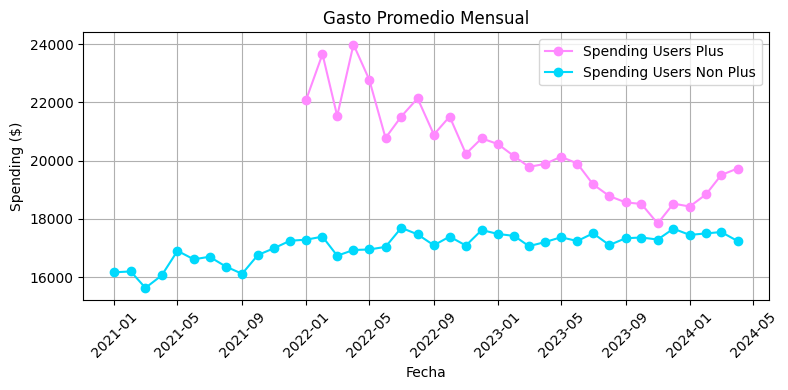

,date_month,monthly_spending_plus,monthly_spending_non_plus,spending_difference,spending_percentual_diff
12,2022-Jan,22095.0,17286.0,4809.0,27.82
13,2022-Feb,23660.0,17390.0,6270.0,36.06
14,2022-Mar,21533.0,16735.0,4798.0,28.67
15,2022-Apr,23989.0,16931.0,7058.0,41.69
16,2022-May,22783.0,16949.0,5834.0,34.42
17,2022-Jun,20779.0,17038.0,3741.0,21.96
18,2022-Jul,21516.0,17693.0,3823.0,21.61
19,2022-Aug,22140.0,17468.0,4672.0,26.75
20,2022-Sep,20895.0,17093.0,3802.0,22.24
21,2022-Oct,21514.0,17391.0,4123.0,23.71


In [95]:
# Calculamos el nuevo gasto mensual
monthly_sales['monthly_spending_plus'] = round(monthly_sales['afv_plus'] * monthly_sales['frequency_plus'])
monthly_sales['monthly_spending_non_plus'] = round(monthly_sales['afv_non_plus'] *  monthly_sales['frequency_non_plus'])
# Crear una nueva columna para la diferencia entre Plus y no Plus
monthly_sales['spending_difference'] = monthly_sales['monthly_spending_plus'] - monthly_sales['monthly_spending_non_plus']
monthly_sales['spending_percentual_diff'] = round((monthly_sales['monthly_spending_plus']/monthly_sales['monthly_spending_non_plus'] - 1)*100 ,2)



# Crear el gráfico de líneas para afv mensual. Lo que nos permite saber cuanto gasta un usuario por pedido.
plt.figure(figsize=(8, 4))
# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['monthly_spending_plus'], marker='o', label='Spending Users Plus', color='#ff8aff')
plt.plot(monthly_sales['date_month'], monthly_sales['monthly_spending_non_plus'], marker='o', label='Spending Users Non Plus', color='#00d9fc')
# Añadir títulos y etiquetas
plt.title('Gasto Promedio Mensual')
plt.xlabel('Fecha')
plt.ylabel('Spending ($)')
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Filtrar los datos desde enero de 2022 y cambiamos el formato para que cuando
# generemos la tabla se vea bien.

monthly_sales['date_month'] = pd.to_datetime(monthly_sales['date_month'])
filtered_sales = monthly_sales[monthly_sales['date_month'] >= '2022-01-01']


# Seleccionar las columnas deseadas
filtered_sales = filtered_sales[['date_month', 'monthly_spending_plus', 'monthly_spending_non_plus', 'spending_difference', 'spending_percentual_diff']]
filtered_sales['date_month'] = filtered_sales['date_month'].dt.strftime('%Y-%b')

# Mostrar el resultado filtrado
data_table.DataTable(filtered_sales)



Por lo que somos capaces de apreciar en el gráfico efecivamente un usuario plus gasta más mensualmente por lo que este es un usuario muy rentable. Ya que ademáse hay que considerar que paga una subscripción mensual. En abril estaba gastando casi 2490 pesos más mensualmente que un usuario no plus lo que significa un gasto 14.44% mayor.. Queda validar si este gasto es significativo.

Hemos realizado un análisis exploratorio en variables mensual pero aun queda comparar en dos/tres factors importantes. La zona del país, tipo de negocio y la vertical del negocio a la que pertenece.

En zonas tenemos 4 macro zonas:
*   Norte
*   5ta o Centro
*   RM
*   sUR

Tipo de negocios:
*   Restaurantes
*   Cafés
*   Markets (propios o externos)
*   Shop, Pets, Botillerias, Farmacias y el negocio de Courier

En las verticales tenemos la vertical de Food, Non food y DMART:
*   Food: Restaurantes + Cafés
*   Non Food: Shop, Pets, Botillerias, Farmacias y el negocio de Courier
*   DMART: Markets exclusivos (subconjutno del tipo de negocio Markets)

In [104]:
# Asegúrate de que las columnas 'vertical' y 'zonas' no tengan valores nulos
df['vertical'] = df['vertical'].fillna('Desconocido')
df['zonas'] = df['zonas'].fillna('Desconocido')

# Agrupar por mes, vertical y zonas, y sumar las órdenes totales y las del programa plus.
monthly_sales = df.groupby([df['date_month'].dt.to_period('M'), 'vertical', 'zonas'])[['total_confirmed_order', 'total_confirmed_orders_plus','tota']].sum().reset_index()

# Convertir el periodo de vuelta a fecha
monthly_sales['date_month'] = monthly_sales['date_month'].dt.to_timestamp()

# Renombrar las columnas para mayor claridad
monthly_sales.rename(columns={
    'total_confirmed_order': 'total_orders',
    'total_confirmed_orders_plus': 'total_orders_plus'
}, inplace=True)

# Filtrar los datos para eliminar los valores de total_orders_plus antes de 2022-01 ya que el proyecto comenzo recién en ese periodo.
monthly_sales.loc[monthly_sales['date_month'] < '2022-01-01', 'total_orders_plus'] = np.nan

# Mostrar el resultado filtrado desde 2022-01 para ambos campos
filtered_sales = monthly_sales[monthly_sales['date_month'] >= '2022-01-01']

# Calcular los porcentajes
monthly_totals = filtered_sales.groupby('date_month')['total_orders'].sum().reset_index().rename(columns={'total_orders': 'total_month_orders'})
filtered_sales = filtered_sales.merge(monthly_totals, on='date_month')
filtered_sales['percentage'] = (filtered_sales['total_orders'] / filtered_sales['total_month_orders']) * 100
filtered_sales['percentage'] = filtered_sales['percentage'].round(2)


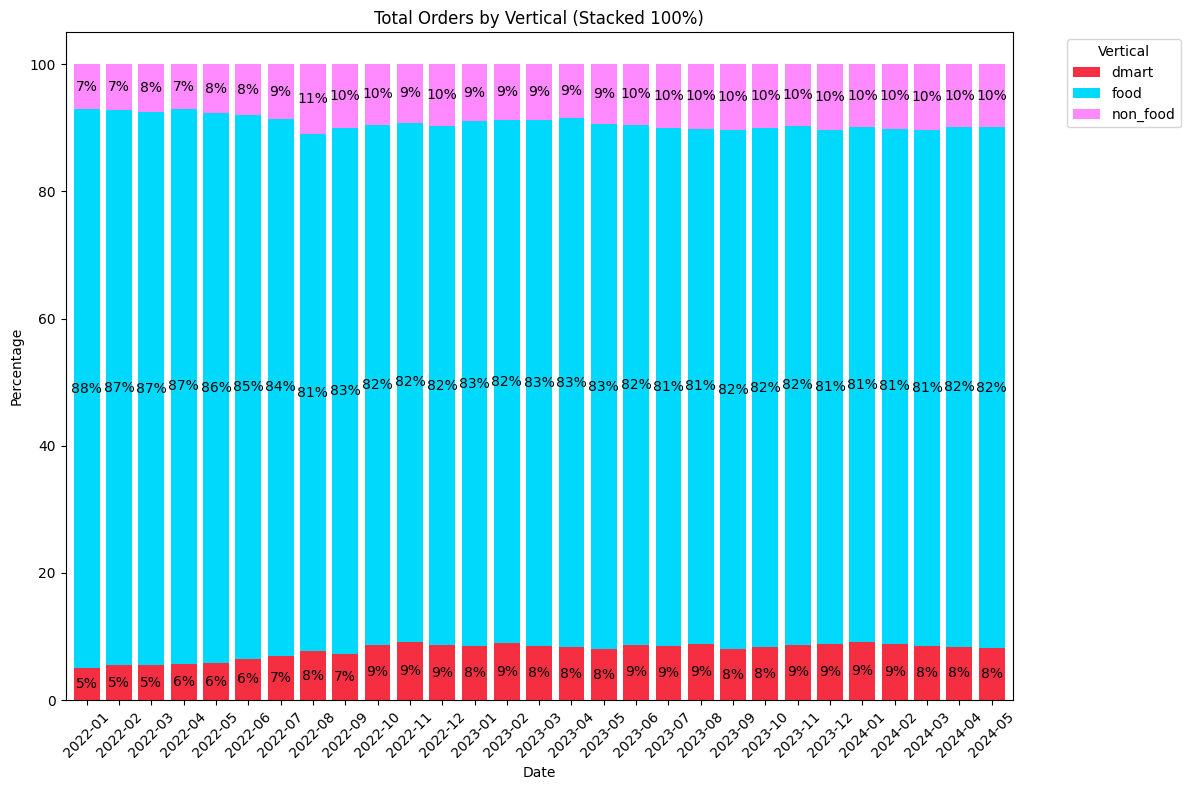

In [105]:
# Pivotar los datos para tener 'vertical' como columnas
pivot_vertical = filtered_sales.pivot_table(index='date_month', columns='vertical', values='total_orders', aggfunc='sum')

# Normalizar los datos para obtener el porcentaje
pivot_vertical_percentage = pivot_vertical.div(pivot_vertical.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
pivot_vertical_percentage.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax)

# Añadir títulos y etiquetas
plt.title('Total Orders by Vertical (Stacked 100%)')
plt.xlabel('Date')
plt.ylabel('Percentage')

# Formatear el eje X para mostrar solo "yyyy-mm"
ax.set_xticklabels([pd.to_datetime(str(date)).strftime('%Y-%m') for date in pivot_vertical_percentage.index])

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas de datos
for c in ax.containers:
    labels = [f'{v:.0f}%' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Mover la leyenda fuera del gráfico
ax.legend(title='Vertical', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



# Crear la tabla de resumen
table_vertical = filtered_sales.pivot_table(index='date_month', columns='vertical', values=['total_orders', 'percentage'], aggfunc='sum')

# Formatear la tabla
table_vertical_style = table_vertical.style.format(precision=2).set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}])

# Mostrar la tabla de resumen
from IPython.display import display
display(table_vertical_style)

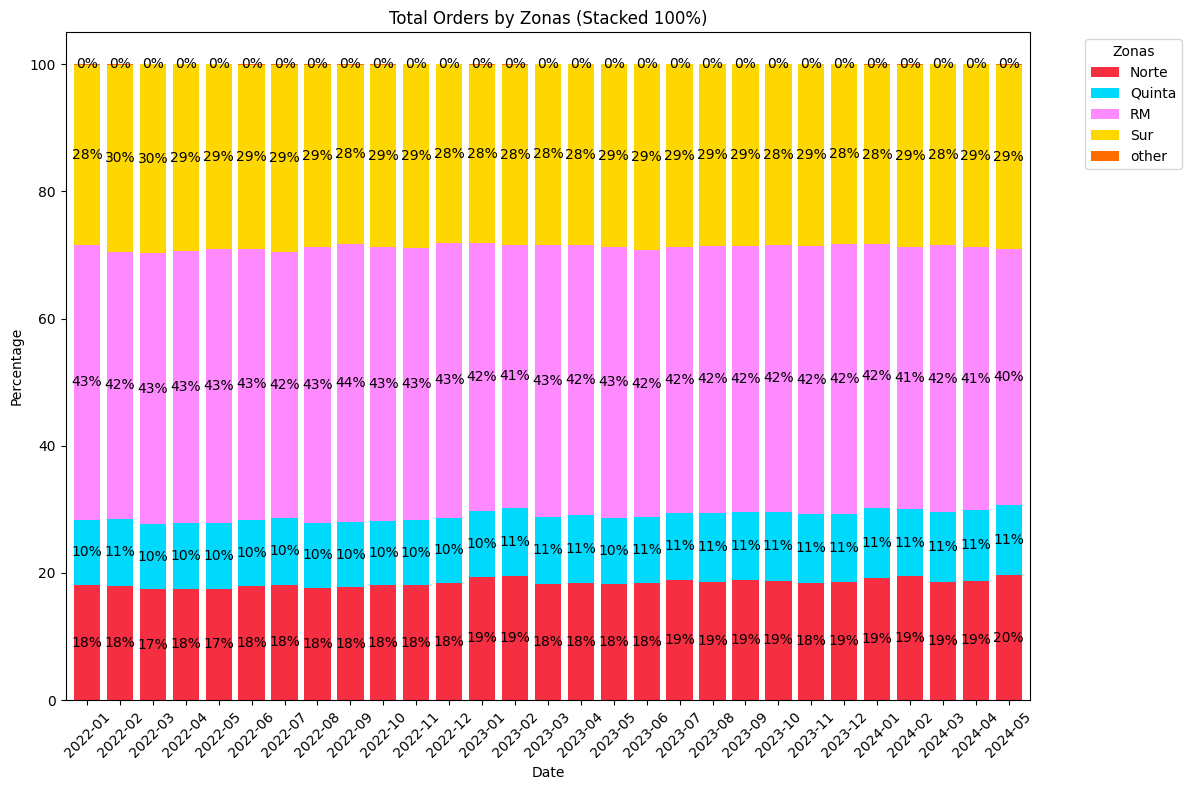

In [10]:
# Pivotar los datos para tener 'zonas' como columnas
pivot_zonas = filtered_sales.pivot_table(index='date_month', columns='zonas', values='total_orders', aggfunc='sum')

# Normalizar los datos para obtener el porcentaje
pivot_zonas_percentage = pivot_zonas.div(pivot_zonas.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
pivot_zonas_percentage.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax)

# Añadir títulos y etiquetas
plt.title('Total Orders by Zonas (Stacked 100%)')
plt.xlabel('Date')
plt.ylabel('Percentage')

# Formatear el eje X para mostrar solo "yyyy-mm"
ax.set_xticklabels([pd.to_datetime(str(date)).strftime('%Y-%m') for date in pivot_zonas_percentage.index])

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas de datos
for c in ax.containers:
    labels = [f'{v:.0f}%' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Mover la leyenda fuera del gráfico
ax.legend(title='Zonas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


